In [66]:
import pandas as pd
import numpy as np


In [67]:
beml_df = pd.read_csv("BEML.csv")
beml_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [68]:
glaxo_df = pd.read_csv("GLAXO.csv")
glaxo_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [69]:
#beml_df.loc[:,["Date","Close"]]
#glaxo_df.iloc[:,[0,5]]

In [70]:
beml_df = beml_df[['Date', 'Close']]
glaxo_df = glaxo_df[['Date', 'Close']]

In [71]:
beml_df

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [72]:
glaxo_df.dtypes

,0
Date,object
Close,float64


In [73]:
glaxo_df['Date']=pd.DatetimeIndex(glaxo_df['Date'])

In [74]:
glaxo_df.dtypes

,0
Date,datetime64[ns]
Close,float64


In [75]:
'''The DataFrames have a date column, so we can
create a DatetimeIndex index from this column Date. It will ensure that the rows are sorted by time in
ascending order.'''
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))

In [76]:
beml_df.head()

,Date,Close
Date,,
2010-01-04,2010-01-04,1135.60
2010-01-05,2010-01-05,1134.60
2010-01-06,2010-01-06,1139.60
2010-01-07,2010-01-07,1144.15
2010-01-08,2010-01-08,1144.05


In [77]:
glaxo_df

,Date,Close
Date,,
2010-01-04,2010-01-04,1625.65
2010-01-05,2010-01-05,1616.80
2010-01-06,2010-01-06,1638.50
2010-01-07,2010-01-07,1648.70
2010-01-08,2010-01-08,1639.80
...,...,...
2016-12-26,2016-12-26,2723.50
2016-12-27,2016-12-27,2701.75
2016-12-28,2016-12-28,2702.15


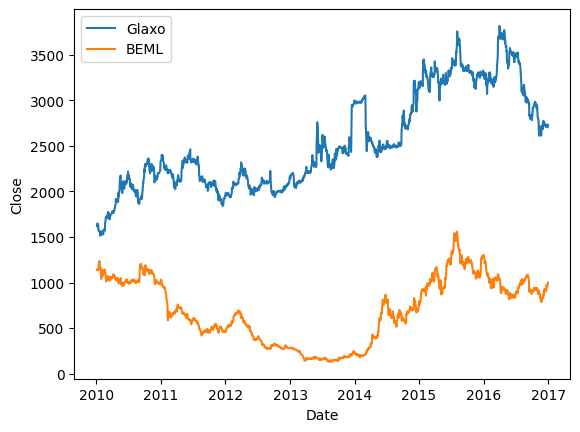

In [78]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.plot(glaxo_df['Date'],glaxo_df.Close,label="Glaxo");
plt.plot(beml_df.Close,label="BEML");
plt.legend()
plt.xlabel('Date');
plt.ylabel('Close');

In [79]:
glaxo_df

,Date,Close
Date,,
2010-01-04,2010-01-04,1625.65
2010-01-05,2010-01-05,1616.80
2010-01-06,2010-01-06,1638.50
2010-01-07,2010-01-07,1648.70
2010-01-08,2010-01-08,1639.80
...,...,...
2016-12-26,2016-12-26,2723.50
2016-12-27,2016-12-27,2701.75
2016-12-28,2016-12-28,2702.15


In [80]:
glaxo_df['gain'] = glaxo_df.Close.pct_change(periods = 1)
beml_df['gain'] = beml_df.Close.pct_change(periods = 1)

In [81]:

glaxo_df

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1625.65,NaN
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398
...,...,...,...
2016-12-26,2016-12-26,2723.50,-0.001283
2016-12-27,2016-12-27,2701.75,-0.007986
2016-12-28,2016-12-28,2702.15,0.000148


In [82]:
#drop first row since it is NaN
glaxo_df = glaxo_df.dropna()
beml_df = beml_df.dropna()

Text(0.5, 1.0, 'Beml')

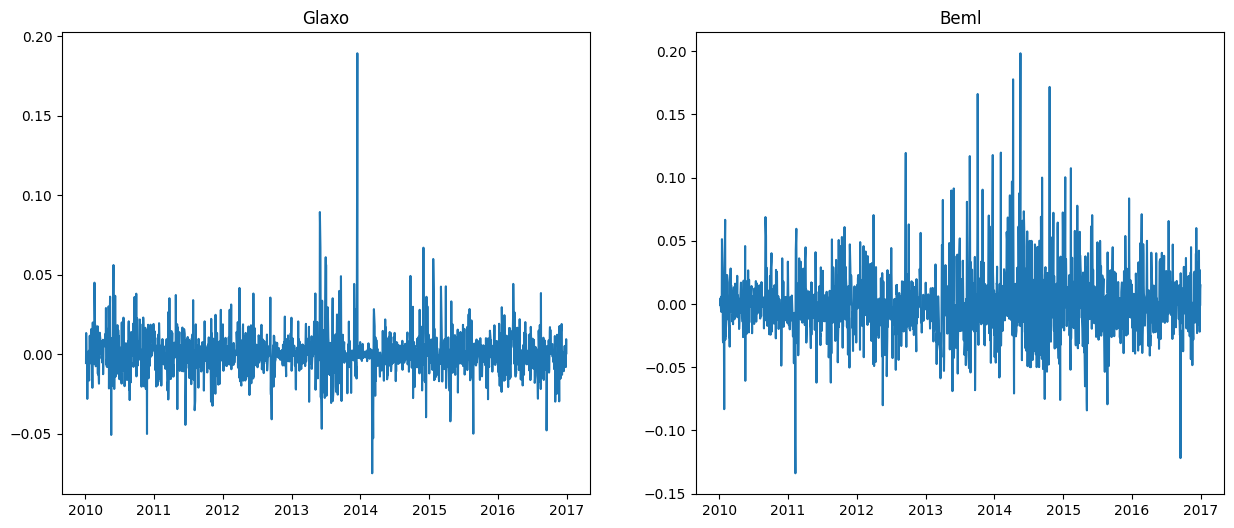

In [83]:

plt.figure(figsize = (15, 6));
plt.subplot(1,2,1)
plt.plot(glaxo_df.gain)
plt.title('Glaxo')

plt.subplot(1,2,2)
plt.plot(beml_df.gain)
plt.title('Beml')

In [84]:
import warnings
warnings.filterwarnings("ignore")

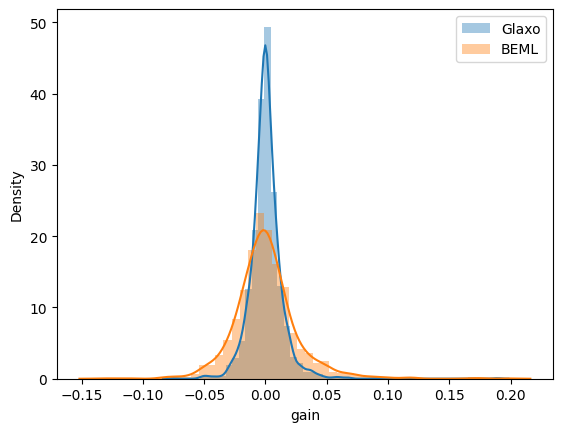

In [85]:
sn.distplot(glaxo_df.gain, label = 'Glaxo');
sn.distplot(beml_df.gain, label = 'BEML');
plt.xlabel('gain');
plt.ylabel('Density');
plt.legend();
plt.show()

In [86]:
print(glaxo_df.gain.skew())
print(beml_df.gain.skew())

2.02282181141302
1.0584515298480952


In [87]:
print(glaxo_df.gain.kurt())
print(beml_df.gain.kurt())

26.619396102837975
6.938736921852841


In [88]:
print('Mean:', round(glaxo_df.gain.mean(), 4))
print('Standard Deviation: ', round(glaxo_df.gain.std(), 4))

Mean: 0.0004
Standard Deviation:  0.0134


In [89]:
print('Mean: ', round(beml_df.gain.mean(), 4))
print('Standard Deviation: ', round(beml_df.gain.std(), 4))

Mean:  0.0003
Standard Deviation:  0.0264


In [90]:
from scipy import stats
#Probability of making 2% loss or higher in Glaxo
stats.norm.cdf( -0.02,
loc=glaxo_df.gain.mean(),
scale=glaxo_df.gain.std())

np.float64(0.06352488667177397)

In [91]:
#Probability of making 2% gain or higher in Glaxo
from scipy import stats
1 - stats.norm.cdf(0.02,
loc=glaxo_df.gain.mean(),
scale=glaxo_df.gain.std())

np.float64(0.07104511457618568)

### Inclass Exercise

### Compute 2% loss or gain for BEML

In [94]:
#construct 95% confidence interval for gain
norm.interval(
    0.95,
    glaxo_df.gain.mean(),
   glaxo_df.gain.std()/np.sqrt(glaxo_df.shape[0])
)

(np.float64(-0.00024208549447730015), np.float64(0.0010141676596618833))

In [100]:
t.interval(
    0.95,
    glaxo_df.shape[0]-1,
    glaxo_df.gain.mean(),
   glaxo_df.gain.std()/np.sqrt(glaxo_df.shape[0])
)

(np.float64(-0.00024252348138881485), np.float64(0.0010146056465733981))

In [95]:
norm.interval(
    0.95,
    beml_df.gain.mean(),
   beml_df.gain.std()/np.sqrt(glaxo_df.shape[0])
)

(np.float64(-0.0009718595923675366), np.float64(0.001513355750482002))

In [60]:
#construct 95% confidence interval for mean balance
from scipy.stats import norm
import numpy as np

In [61]:
norm.interval(0.95,loc=1990,scale=2500/np.sqrt(140))

(np.float64(1575.8820248378292), np.float64(2404.1179751621708))

In [62]:
norm.ppf(1-0.05/2)

np.float64(1.959963984540054)

In [97]:
from scipy.stats import t
t.interval(0.95,139,loc=1990,scale=2833/np.sqrt(140))   #Confidence level,degree of freedom, sample mean, sample variation(s/root(n))

(np.float64(1516.5999869168315), np.float64(2463.4000130831682))